In [83]:
# Add the relevant scripts from LArMachineLearningData
# Nice the process so it can run with lots of cores on low priority
import os
os.nice(20)

# Add local paths
import sys
hnlDIR = os.environ['_']
sys.path.append('../pyscript')

# From pyscript Library
from Plotting import *
from Dictionary import *
from HelperFunctions import *
from CutFunctions import *

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import pyhf
from pyhf.contrib.viz import brazil

pyhf.set_backend("numpy")

In [84]:
ifSave = False
savePath = "../plot_files/07Mar2024_systematics/"

<h1> Read in HNL Dictionary </h1>

In [85]:
# Load
hnl_dict_m200 = np.load('../pkl_files/m200_v3.npy',allow_pickle='TRUE').item()

In [86]:
mass_list = [200]

In [87]:
#hnl_dict = {**hnl_dict_m140, **hnl_dict_m200, **hnl_dict_m240}
hnl_dict = {**hnl_dict_m200}

#del hnl_dict_m140
del hnl_dict_m200
#del hnl_dict_m240

In [88]:
for k, v in hnl_dict[200].items():
    print(k ,v)
    print('\n')

U 1e-07


bins [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0]


sig [13.356289031301518, 12.465869762548083, 12.822037470049457, 10.744392509624777, 8.429302410865848, 8.073134703364474, 8.607386264616533, 11.456727924627524, 16.50243711423032, 23.1509009875893, 32.94551294387708, 39.47525424806893, 43.63054416891829, 44.8771311451731, 36.09166102680588, 29.621281007197588, 23.44770741050711, 21.191978596331744, 14.484153438389201]


sig_stat [0.8904192687534346, 0.8602267390381684, 0.8724291462352144, 0.7986244057385996, 0.7073713446643957, 0.6922655896459475, 0.7148045226315705, 0.8246733212189294, 0.9897504058398595, 1.1722914406793907, 1.3984591412025318, 1.5307847012000404, 1.609336866211311, 1.6321654797239364, 1.4637101356845514, 1.3260306525861025, 1.1797821970292717, 1.1215984452314518, 0.9272529073603404]


sig_flx_lo [12.47641459 11.75975336 12.04679296 10.18167005  7.97687638  7.73907904
  8.14854834 10.6744322

In [167]:
xmin = 0
xmax = 19
xnbin = 19

hnl_ymin = 0
hnl_ymax = 1200

nu_ymin = 0
nu_ymax = 50
scale_factor = 0.0593612845835623
scale_factor_nu = 88.43293673468362

width = 18.936

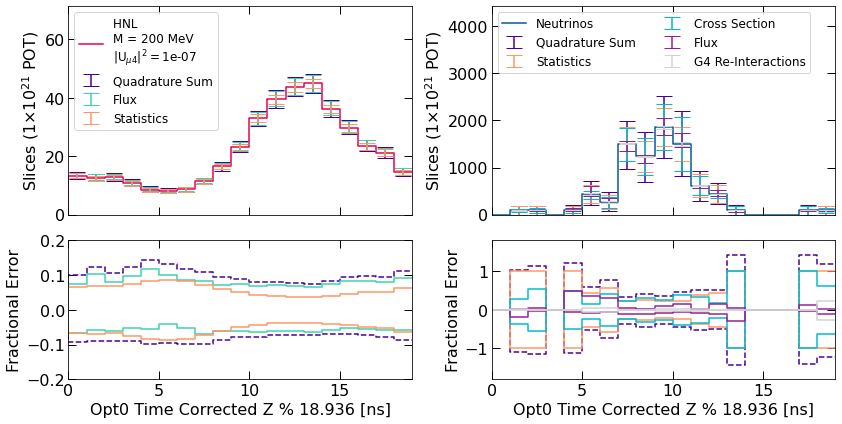

In [170]:
fig, ((ax1, ax3),(ax2, ax4)) = plt.subplots(2, 2, gridspec_kw={'height_ratios': [3, 2]}, figsize = (12, 6), sharex = True)
#fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (12, 6), sharex = True)

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax

bins = hnl_dict[200]['bins']
bins_mid = np.convolve(bins, [0.5, 0.5], "valid")
#=========================================================================#
#HNL
#=========================================================================#
ax1.step(bins , np.insert(hnl_dict[200]['sig'], 0, 0)
         , color = col_dict['Coral']
         , label =  "HNL \nM = 200 MeV\n|U$_{\mu4}|^{2} = $" +str("{:.3g}".format(hnl_dict[200]['U']))
        )
#-----------------------------------------------------------------#
#QuadSum
ax1.errorbar(bins_mid, hnl_dict[200]['sig']
            , [np.array(hnl_dict[200]['sig']) - np.array(hnl_dict[200]['sig_quadSum_lo'])
               , np.array(hnl_dict[200]['sig_quadSum_hi']) - np.array(hnl_dict[200]['sig'])]
            , ls='none'
            , color = col_dict['DeepViolet']
            , capsize=8
            ,label = "Quadrature Sum"
           )
#-----------------------------------------------------------------#
#Flux
ax1.errorbar(bins_mid, hnl_dict[200]['sig']
            , [np.array(hnl_dict[200]['sig']) - np.array(hnl_dict[200]['sig_flx_lo'])
               , np.array(hnl_dict[200]['sig_flx_hi']) - np.array(hnl_dict[200]['sig'])]
            , ls='none'
            , color = col_dict['Spearmint']
            , capsize=8
            ,label = "Flux"
           )
#-----------------------------------------------------------------#
#STATS
ax1.errorbar(bins_mid, hnl_dict[200]['sig']
            , np.array(hnl_dict[200]['sig_stat'])
            , ls='none'
            , color = col_dict['Peach']
            , capsize=8
            ,label = "Statistics"
           )

#-----------------------------------------------------------------#
ax1.legend(loc = 'upper left',fontsize = 12)
plot_tick(ax1, 16)
plot_title(ax1, "", '',  r"Slices (1$\times10^{21}$ POT)", 16)

ax1.set_xlim(xmin, xmax)

ax1.set_ylim(hnl_ymin, hnl_ymax * scale_factor)
#=========================================================================#
#-----------------------------------------------------------------#
#QuadSum
pltdf = np.insert((np.array(hnl_dict[200]['sig']) - np.array(hnl_dict[200]['sig_quadSum_lo'])) / np.array(hnl_dict[200]['sig']),0,0) * -1
ax2.step(bins, pltdf
         , color = col_dict['DeepViolet'] , linestyle = '--'
        )

pltdf = np.insert((np.array(hnl_dict[200]['sig_quadSum_hi']) -np.array(hnl_dict[200]['sig'])) / np.array(hnl_dict[200]['sig']),0,0)
ax2.step(bins, pltdf 
         , color = col_dict['DeepViolet'] , linestyle = '--'
        )
#-----------------------------------------------------------------#
#Flux
pltdf = np.insert((np.array(hnl_dict[200]['sig']) - np.array(hnl_dict[200]['sig_flx_lo'])) / np.array(hnl_dict[200]['sig']),0,0) * -1
ax2.step(bins, pltdf
         , color = col_dict['Spearmint']
        )

pltdf = np.insert((np.array(hnl_dict[200]['sig_flx_hi']) -np.array(hnl_dict[200]['sig'])) / np.array(hnl_dict[200]['sig']),0,0)
ax2.step(bins, pltdf
         , color = col_dict['Spearmint']
        )
#-----------------------------------------------------------------#
#STATS
pltdf = np.insert(np.array(hnl_dict[200]['sig_stat']) / np.array(hnl_dict[200]['sig']),0,0) * -1
ax2.step(bins, pltdf
         , color = col_dict['Peach']
        )
pltdf = np.insert(np.array(hnl_dict[200]['sig_stat']) / np.array(hnl_dict[200]['sig']),0,0)
ax2.step(bins, pltdf
         , color = col_dict['Peach']
        )

#-----------------------------------------------------------------#

#ax2.legend(loc = 'upper right',fontsize = 14)
plot_tick(ax2, 16)
plot_title(ax2,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Fractional Error", 16)


ax2.set_xlim(xmin, xmax)
ax2.set_ylim(-0.2, 0.2)
#ax2.set_ylim(-1.8, 1.8)
#=========================================================================#
#Neutrinos
#=========================================================================#
ax3.step(bins , np.insert(hnl_dict[200]['bkg'], 0, 0)
         , color = col_dict['Teal']
         , label =  "Neutrinos"
        )
#-----------------------------------------------------------------#
#QuadSum
ax3.errorbar(bins_mid, hnl_dict[200]['bkg']
            , [np.array(hnl_dict[200]['bkg']) - np.array(hnl_dict[200]['bkg_quadSum_lo'])
               , np.array(hnl_dict[200]['bkg_quadSum_hi']) - np.array(hnl_dict[200]['bkg'])]
            , ls='none'
            , color = col_dict['DeepViolet']
            , capsize=8
            ,label = "Quadrature Sum"
           )
#-----------------------------------------------------------------#
#STATS
ax3.errorbar(bins_mid, hnl_dict[200]['bkg']
            , np.array(hnl_dict[200]['bkg_stat'])
            , ls='none'
            , color = col_dict['Peach']
            , capsize=8
            ,label = "Statistics"
           )
#-----------------------------------------------------------------#
#Xsec
ax3.errorbar(bins_mid, hnl_dict[200]['bkg']
            , [np.array(hnl_dict[200]['bkg']) - np.array(hnl_dict[200]['bkg_xsec_lo'])
               , np.array(hnl_dict[200]['bkg_xsec_hi']) - np.array(hnl_dict[200]['bkg'])]
            , ls='none'
            , color = col_dict['Aqua']
            , capsize=8
            ,label = "Cross Section"
           )
#-----------------------------------------------------------------#
#Flux
ax3.errorbar(bins_mid, hnl_dict[200]['bkg']
            , [np.array(hnl_dict[200]['bkg']) - np.array(hnl_dict[200]['bkg_flx_lo'])
               , np.array(hnl_dict[200]['bkg_flx_hi']) - np.array(hnl_dict[200]['bkg'])]
            , ls='none'
            , color = col_dict['Purple']
            , capsize=8
            ,label = "Flux"
           )
#-----------------------------------------------------------------#
#G4
ax3.errorbar(bins_mid, hnl_dict[200]['bkg']
            , [np.array(hnl_dict[200]['bkg']) - np.array(hnl_dict[200]['bkg_g4_lo'])
               , np.array(hnl_dict[200]['bkg_g4_hi']) - np.array(hnl_dict[200]['bkg'])]
            , ls='none'
            , color = col_dict['LightGray']
            , capsize=8
            ,label = "G4 Re-Interactions"
           )
#-----------------------------------------------------------------#
ax3.legend(loc = 'upper left',fontsize = 12, ncol = 2)
plot_tick(ax3, 16)
plot_title(ax3, "", '',  r"Slices (1$\times10^{21}$ POT)", 16)

ax3.set_xlim(xmin, xmax)

ax3.set_ylim(hnl_ymin, nu_ymax * scale_factor_nu)

#=========================================================================#
#-----------------------------------------------------------------#
#QuadSum
pltdf = np.insert((np.array(hnl_dict[200]['bkg']) - np.array(hnl_dict[200]['bkg_quadSum_lo'])) / np.array(hnl_dict[200]['bkg']),0,0) * -1
pltdf[np.isnan(pltdf)] = 0
ax4.step(bins, pltdf
         , color = col_dict['DeepViolet'] , linestyle = '--'
        )

pltdf = np.insert((np.array(hnl_dict[200]['bkg_quadSum_hi']) -np.array(hnl_dict[200]['bkg'])) / np.array(hnl_dict[200]['bkg']),0,0)
pltdf[np.isnan(pltdf)] = 0
ax4.step(bins, pltdf 
         , color = col_dict['DeepViolet'] , linestyle = '--'
        )
#-----------------------------------------------------------------#
#STATS
pltdf = np.insert(np.array(hnl_dict[200]['bkg_stat']) / np.array(hnl_dict[200]['bkg']),0,0) * -1
pltdf[np.isnan(pltdf)] = 0
ax4.step(bins, pltdf
         , color = col_dict['Peach']
        )
pltdf = np.insert(np.array(hnl_dict[200]['bkg_stat']) / np.array(hnl_dict[200]['bkg']),0,0)
pltdf[np.isnan(pltdf)] = 0
ax4.step(bins, pltdf
         , color = col_dict['Peach']
        )
#-----------------------------------------------------------------#
#XSEC
pltdf = np.insert((np.array(hnl_dict[200]['bkg']) - np.array(hnl_dict[200]['bkg_xsec_lo'])) / np.array(hnl_dict[200]['bkg']),0,0) * -1
pltdf[np.isnan(pltdf)] = 0
ax4.step(bins, pltdf
         , color = col_dict['Aqua'] 
        )

pltdf = np.insert((np.array(hnl_dict[200]['bkg_xsec_hi']) -np.array(hnl_dict[200]['bkg'])) / np.array(hnl_dict[200]['bkg']),0,0)
pltdf[np.isnan(pltdf)] = 0
ax4.step(bins, pltdf 
         , color = col_dict['Aqua'] 
        )
#-----------------------------------------------------------------#
#Flux
pltdf = np.insert((np.array(hnl_dict[200]['bkg']) - np.array(hnl_dict[200]['bkg_flx_lo'])) / np.array(hnl_dict[200]['bkg']),0,0) * -1
pltdf[np.isnan(pltdf)] = 0
ax4.step(bins, pltdf
         , color = col_dict['Purple']
        )

pltdf = np.insert((np.array(hnl_dict[200]['bkg_flx_hi']) -np.array(hnl_dict[200]['bkg'])) / np.array(hnl_dict[200]['bkg']),0,0)
pltdf[np.isnan(pltdf)] = 0
ax4.step(bins, pltdf
         , color = col_dict['Purple']
        )
#-----------------------------------------------------------------#
#G4
pltdf = np.insert((np.array(hnl_dict[200]['bkg']) - np.array(hnl_dict[200]['bkg_g4_lo'])) / np.array(hnl_dict[200]['bkg']),0,0) * -1
pltdf[np.isnan(pltdf)] = 0
ax4.step(bins, pltdf
         , color = col_dict['LightGray']
        )

pltdf = np.insert((np.array(hnl_dict[200]['bkg_g4_hi']) -np.array(hnl_dict[200]['bkg'])) / np.array(hnl_dict[200]['bkg']),0,0)
pltdf[np.isnan(pltdf)] = 0
ax4.step(bins, pltdf
         , color = col_dict['LightGray']
        )
#-----------------------------------------------------------------#

#ax2.legend(loc = 'upper right',fontsize = 14)
plot_tick(ax4, 16)
plot_title(ax4,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Fractional Error", 16)


ax4.set_xlim(xmin, xmax)
ax4.set_ylim(-1.8, 1.8)
#=========================================================================#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("hnl_beam_bucket_combined_standard_error_scaleToPOT.png"), dpi=200)
    
plt.show()

<h1>Quadrature Sum Uncorr</h1>

In [171]:
model_dict = pyhf.Model(
        {
      "channels": [
        {
          "name": "singlechannel",
          "samples": [
            {
              "name": "signal",
              "data": hnl_dict[200]['sig'],
              "modifiers": [
                {"name": "mu", "type": "normfactor", "data": None}, #This is the scaling which is to be calculated
                {"name": "uncorr_quadSum_sig", "type": "shapesys", "data": hnl_dict[200]['sig_quadSum']},
              ]
            },
            {
              "name": "background",
              "data": hnl_dict[200]['bkg'],
              "modifiers": [
                {"name": "uncorr_quadSum_bkg", "type": "shapesys", "data": hnl_dict[200]['bkg_quadSum']},
              ]
            }
          ]
        }
      ]
    }
    )

print(f'Samples:\n {model_dict.config.samples}')
print(f'Modifiers are:\n {model_dict.config.modifiers}')

# No DATA --> Data == Background

data = hnl_dict[200]['bkg'] + model_dict.config.auxdata

Samples:
 ['background', 'signal']
Modifiers are:
 [('mu', 'normfactor'), ('uncorr_quadSum_bkg', 'shapesys'), ('uncorr_quadSum_sig', 'shapesys')]


In [172]:
poi_values = np.linspace(0, 0.1, 50)

obs_limit_single, exp_limits_single, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(data, 
                                                                                        model_dict, 
                                                                                        poi_values, 
                                                                                        level=0.1, 
                                                                                        return_results=True)

print(f"Upper limit (obs): μ = {obs_limit_single:.4f}")
print(f"Upper limit (exp): μ = {exp_limits_single[2]:.4f}" + "\n")

EXP_LIMIT = np.sqrt(exp_limits_single[2]) * hnl_dict[200]['U']
LIMIT = np.sqrt(obs_limit_single) * hnl_dict[200]['U']

print(f"Expected limit is " + str(EXP_LIMIT))
print(f"Observed limit is " + str(LIMIT)+ "\n")

quadSumUncorr = EXP_LIMIT

Upper limit (obs): μ = 0.0120
Upper limit (exp): μ = 0.0120

Expected limit is 1.0957448465663603e-08
Observed limit is 1.0957448465663603e-08



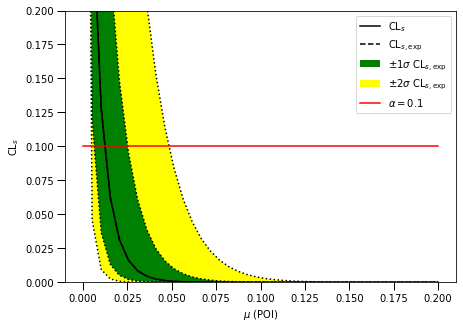

In [173]:
poi_vals = np.linspace(0, 0.2, 40)

results = [
    pyhf.infer.hypotest(
        test_poi, data, model_dict, test_stat="qtilde", return_expected_set=True
    )
    for test_poi in poi_vals
]

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
brazil.plot_results(poi_vals, results, ax=ax, test_size=0.10,)
plt.ylim(0.0,0.2)
fig.show()

<h1> Declare Flux/XSec/G4 As Correlated  </h1>

In [174]:
def declare_model(hnl_dict):
    model_dict = pyhf.Model(
        {
      "channels": [
        {
          "name": "singlechannel",
          "samples": [
            {
              "name": "signal",
              "data": hnl_dict['sig'],
              "modifiers": [
                #fitting parameter
                {"name": "mu", "type": "normfactor", "data": None}, #This is the scaling which is to be calculated
                #stat - uncorrelated
                {"name": "stat_uncorr_sig" , "type": "shapesys", "data": hnl_dict['sig_stat']},
                #flux - correlated
                {"name": "flux_corr_sig" , "type": "histosys", "data": {"lo_data": hnl_dict['sig_flx_lo'], "hi_data": hnl_dict['sig_flx_hi']}},
                  
              ]
            },
            {
              "name": "background",
              "data": hnl_dict['bkg'],
              "modifiers": [
                #stat - uncorrelated
                {"name": "stat_uncorr_bkg" , "type": "shapesys", "data": hnl_dict['bkg_stat']},
                #flux - correlated
                {"name": "flux_corr_bkg" , "type": "histosys", "data": {"lo_data": hnl_dict['bkg_flx_lo'], "hi_data": hnl_dict['bkg_flx_hi']}},
                #xsec - correlated
                {"name": "xsec_corr_bkg" , "type": "histosys", "data": {"lo_data": hnl_dict['bkg_xsec_lo'], "hi_data": hnl_dict['bkg_xsec_hi']}},
                #g4 - correlated
                {"name": "g4_corr_bkg" , "type": "histosys", "data": {"lo_data": hnl_dict['bkg_g4_lo'], "hi_data": hnl_dict['bkg_g4_hi']}},
              ]
            }
          ]
        }
      ]
    }
    )

    print(f'Samples:\n {model_dict.config.samples}')
    print(f'Modifiers are:\n {model_dict.config.modifiers}')

    # No DATA --> Data == Background

    data = hnl_dict['bkg'] + model_dict.config.auxdata
    
    return model_dict, data

In [175]:
for m in mass_list:
    
    print('Fitting mass ' + str(m))
    model_dict, data = declare_model(hnl_dict[m])

    poi_values = np.linspace(0, 0.1, 50)

    obs_limit_single, exp_limits_single, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(data, 
                                                                                        model_dict, 
                                                                                        poi_values, 
                                                                                        level=0.1, 
                                                                                        return_results=True)
    print()
    print(f"Upper limit (obs): μ = {obs_limit_single:.4f}")
    print(f"Upper limit (exp): μ = {exp_limits_single[2]:.4f}" + "\n")

    EXP_LIMIT = np.sqrt(exp_limits_single[2]) * hnl_dict[m]['U']
    LIMIT = np.sqrt(obs_limit_single) * hnl_dict[m]['U']

    print(f"Expected limit is " + str(EXP_LIMIT))
    print(f"Observed limit is " + str(LIMIT)+ "\n")
    
    CL_bands = []
    for sigma in exp_limits_single:
        CL_bands.append(np.sqrt(sigma) * hnl_dict[m]['U'])
    
    hnl_dict[m]['Limits'] = CL_bands
    print(CL_bands)

Fitting mass 200
Samples:
 ['background', 'signal']
Modifiers are:
 [('flux_corr_bkg', 'histosys'), ('flux_corr_sig', 'histosys'), ('g4_corr_bkg', 'histosys'), ('mu', 'normfactor'), ('stat_uncorr_bkg', 'shapesys'), ('stat_uncorr_sig', 'shapesys'), ('xsec_corr_bkg', 'histosys')]

Upper limit (obs): μ = 0.0120
Upper limit (exp): μ = 0.0120

Expected limit is 1.0962781455327544e-08
Observed limit is 1.0962781455327544e-08

[5.8116714455366175e-09, 7.68092635060501e-09, 1.0962781455327544e-08, 1.586268267071481e-08, 2.202348889325412e-08]


In [176]:
for m in mass_list:
    print(hnl_dict[m]['U'])

1e-07


<h1>Plot</h1>

In [177]:
neg2sigma = []
neg1sigma = []
expect = []
pos1sigma = []
pos2sigma = []

for m in mass_list:
    neg2sigma.append(hnl_dict[m]['Limits'][0])
    neg1sigma.append(hnl_dict[m]['Limits'][1])
    expect.append(hnl_dict[m]['Limits'][2])
    pos1sigma.append(hnl_dict[m]['Limits'][3])
    pos2sigma.append(hnl_dict[m]['Limits'][4])
    

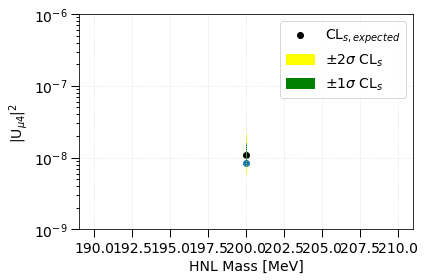

In [181]:
fig, ax1 = plt.subplots(1,1, figsize=(6,4))

xlimmin = 140
xlimmax = 240

plt.grid(axis = 'both', color='gainsboro', linestyle = ":")
#-------------------------------------------------------------------
ax1.plot(mass_list, neg2sigma, color = 'black', linestyle = ':')
ax1.plot(mass_list, neg1sigma, color = 'black', linestyle = ':')
ax1.plot(mass_list, pos1sigma, color = 'black', linestyle = ':')
ax1.plot(mass_list, pos2sigma, color = 'black', linestyle = ':')


ax1.scatter(mass_list, expect, color = 'black', linestyle = '-', label = r'CL$_{s, expected}$')
ax1.scatter(mass_list, 8.371627933396566e-09)
#-------------------------------------------------------------------

 
ax1.fill_between(mass_list, neg2sigma, pos2sigma, color = 'yellow', label = r'$\pm 2 \sigma$ CL$_{s}$')
ax1.fill_between(mass_list, neg1sigma, pos1sigma, color = 'green', label = r'$\pm 1 \sigma$ CL$_{s}$')   

#-------------------------------------------------------------------
#plt.xlim(180, 220)
plt.ylim(1e-9, 1e-6)
ax1.set_yscale('log')

plt.legend(loc="upper right", fontsize =14)

ax1.set_xlabel( "HNL Mass [MeV]", fontsize =14)
ax1.set_ylabel("|U$_{\mu4}$|$^2$", fontsize =14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#-------------------------------------------------------------------
fig.tight_layout()
if ifSave:
    plt.savefig(savePath+str("sensitivity_test.png"), dpi=200)
plt.show()